In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url1 = '/content/drive/MyDrive/Colab Notebooks/NybSys/data/weatherAUS.csv'

In [4]:
df_weather = pd.read_csv(url1,encoding='utf-8')

In [5]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df_weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
print(df_weather.shape)
print(df_weather.dtypes)

(145460, 23)
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


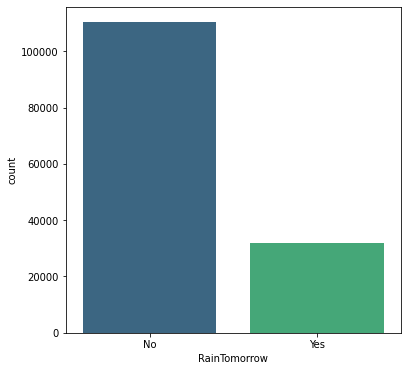

In [8]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="RainTomorrow", data=df_weather, palette="viridis")
plt.show()

# Handle Missing Data

In [9]:
missing_data = df_weather.isnull().sum().sort_values(ascending=False)
percent = (df_weather.isnull().sum()/df_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total_missing', 'Percent'])
print(missing_data)

               Total_missing   Percent
Sunshine               69835  0.480098
Evaporation            62790  0.431665
Cloud3pm               59358  0.408071
Cloud9am               55888  0.384216
Pressure9am            15065  0.103568
Pressure3pm            15028  0.103314
WindDir9am             10566  0.072639
WindGustDir            10326  0.070989
WindGustSpeed          10263  0.070555
Humidity3pm             4507  0.030984
WindDir3pm              4228  0.029066
Temp3pm                 3609  0.024811
RainTomorrow            3267  0.022460
RainToday               3261  0.022419
Rainfall                3261  0.022419
WindSpeed3pm            3062  0.021050
Humidity9am             2654  0.018246
WindSpeed9am            1767  0.012148
Temp9am                 1767  0.012148
MinTemp                 1485  0.010209
MaxTemp                 1261  0.008669
Location                   0  0.000000
Date                       0  0.000000


 There are 4 columns around 40% missing data. So, we need to handle that.
Lets find the categorical and continuous value. Then we'll use the mean/mode value for these missing value.

In [10]:
category=[]
contin = []

for i in df_weather.columns:
    if df_weather[i].dtype =="object":
        category.append(i)
        
    else:
        contin.append(i)

print("Categorical:",category)
print("Continuous:", contin)

Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Continuous: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [11]:
# filling the missing values for continuous variables with mean
df_weather["MinTemp"]= df_weather["MinTemp"].fillna(df_weather["MinTemp"].mean())
df_weather["MaxTemp"]= df_weather["MaxTemp"].fillna(df_weather["MaxTemp"].mean())
df_weather["Evaporation"]= df_weather["Evaporation"].fillna(df_weather["Evaporation"].mean())
df_weather["Sunshine"]= df_weather["Sunshine"].fillna(df_weather["Sunshine"].mean())
df_weather["WindGustSpeed"]= df_weather["WindGustSpeed"].fillna(df_weather["WindGustSpeed"].mean())
df_weather["Rainfall"]= df_weather["Rainfall"].fillna(df_weather["Rainfall"].mean())
df_weather["WindSpeed9am"]= df_weather["WindSpeed9am"].fillna(df_weather["WindSpeed9am"].mean())
df_weather["WindSpeed3pm"]= df_weather["WindSpeed3pm"].fillna(df_weather["WindSpeed3pm"].mean())
df_weather["Humidity9am"]= df_weather["Humidity9am"].fillna(df_weather["Humidity9am"].mean())
df_weather["Humidity3pm"]= df_weather["Humidity3pm"].fillna(df_weather["Humidity3pm"].mean())
df_weather["Pressure9am"]= df_weather["Pressure9am"].fillna(df_weather["Pressure9am"].mean())
df_weather["Pressure3pm"]= df_weather["Pressure3pm"].fillna(df_weather["Pressure3pm"].mean())
df_weather["Cloud9am"]= df_weather["Cloud9am"].fillna(df_weather["Cloud9am"].mean())
df_weather["Cloud3pm"]= df_weather["Cloud3pm"].fillna(df_weather["Cloud3pm"].mean())
df_weather["Temp9am"]= df_weather["Temp9am"].fillna(df_weather["Temp9am"].mean())
df_weather["Temp3pm"]= df_weather["Temp3pm"].fillna(df_weather["Temp3pm"].mean())

In [12]:
#Filling the missing values for continuous variables with mode
df_weather['RainToday']=df_weather['RainToday'].fillna(df_weather['RainToday'].mode()[0])
df_weather['RainTomorrow']=df_weather['RainTomorrow'].fillna(df_weather['RainTomorrow'].mode()[0])
df_weather['WindDir9am'] = df_weather['WindDir9am'].fillna(df_weather['WindDir9am'].mode()[0])
df_weather['WindGustDir'] = df_weather['WindGustDir'].fillna(df_weather['WindGustDir'].mode()[0])
df_weather['WindDir3pm'] = df_weather['WindDir3pm'].fillna(df_weather['WindDir3pm'].mode()[0])

# Label Encoding


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_weather['RainToday'] = df_weather['RainToday'].map({'Yes': 1, 'No': 0})

In [15]:
#encoding remaining columns
df_weather["Location"] = le.fit_transform(df_weather["Location"])
df_weather["WindDir9am"]= le.fit_transform(df_weather["WindDir9am"])
df_weather["WindDir3pm"]= le.fit_transform(df_weather["WindDir3pm"])
df_weather["WindGustDir"] = le.fit_transform(df_weather["WindGustDir"])

#Feature Engineering
Now we'll parse the date and extract year and month.

In [16]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

df_weather['Year'] = df_weather['Date'].dt.year
df_weather['Month'] = df_weather['Date'].dt.month
df_weather['Day'] = df_weather['Date'].dt.day

df_weather.drop('Date', axis=1, inplace = True)

In [17]:
df_weather = df_weather[['Year','Month','Day', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]

# Correlation between the attributes
After finding the cor() value we'll drop the highly correlated attributes.

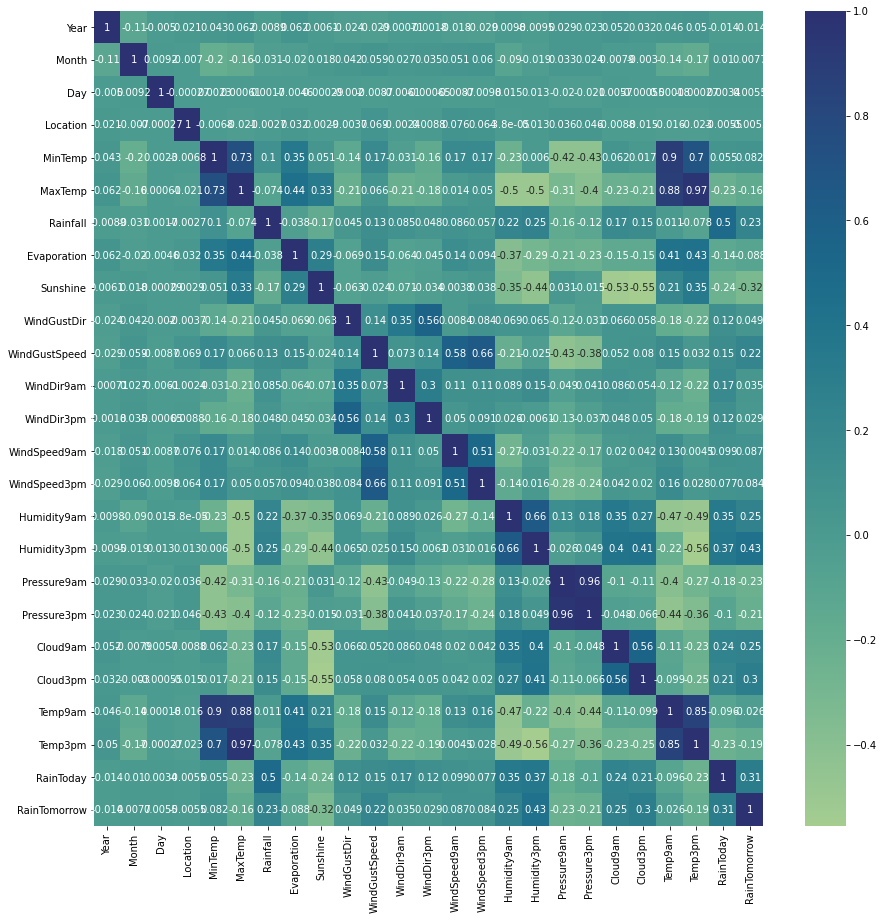

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df_weather.corr(), cmap="crest",annot=True)
plt.xticks(rotation=90)
plt.show()

MaxTemp and Temp3pm highly correlated.
Temp3pm and Temp9am highly correlated.
Humidity9am and Humidity3pm highly correlated.
MaxTemp and Temp9am highly correlated.
MinTemp and Temp9am highly correlated.
MinTemp and Temp3pm highly correlated.


In [20]:
df_weather=df_weather.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
df_weather.columns

Index(['Year', 'Month', 'Day', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

# Normalize data

In [ ]:
# # Standardizing data
# from sklearn import preprocessing
# r_scaler = preprocessing.MinMaxScaler()
# r_scaler.fit(df_weather)
# df_weather_norm = pd.DataFrame(r_scaler.transform(df_weather), index=df_weather.index, columns=df_weather.columns)

# Train-test Split

In [22]:
x = df_weather.drop('RainTomorrow', axis=1)
y = df_weather['RainTomorrow']

In [23]:
x

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,2008,12,1,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0
1,2008,12,2,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0
2,2008,12,3,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0
3,2008,12,4,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0
4,2008,12,5,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017,6,21,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,13.0,11.0,24.0,1024.6,1020.3,4.447461,4.50993,0
145456,2017,6,22,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,13.0,9.0,21.0,1023.5,1019.1,4.447461,4.50993,0
145457,2017,6,23,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,9.0,9.0,24.0,1021.0,1016.8,4.447461,4.50993,0
145458,2017,6,24,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,13.0,7.0,24.0,1019.4,1016.5,3.000000,2.00000,0


In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [26]:
# Split into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6)

# Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score

XGB Model

In [28]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28301
           1       0.73      0.48      0.58      8064

    accuracy                           0.85     36365
   macro avg       0.80      0.71      0.74     36365
weighted avg       0.84      0.85      0.83     36365

XGBoost Model Accuracy: 84.56207892204043 %


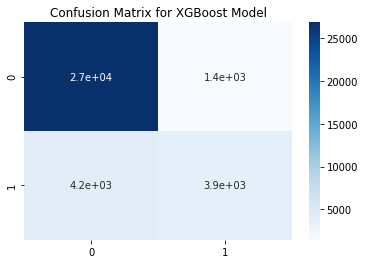

In [29]:
y_predxgb = xgbc.predict(x_test)
report = classification_report(y_test, y_predxgb)
print(report)
print("XGBoost Model Accuracy:",accuracy_score(y_test,y_predxgb)*100,"%")
cm = confusion_matrix(y_test, y_predxgb)
sns.heatmap(cm, annot=True,cmap="Blues")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

Random Forest

In [30]:
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28301
           1       0.76      0.51      0.61      8064

    accuracy                           0.86     36365
   macro avg       0.82      0.73      0.76     36365
weighted avg       0.85      0.86      0.84     36365

Random Forest Model Accuracy: 85.54929190155369 %


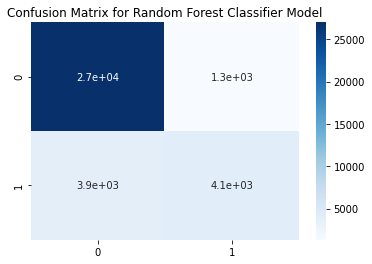

In [31]:

y_predrf = classifier.predict(x_test)
report2 = classification_report(y_test, y_predrf)
print(report2)
print("Random Forest Model Accuracy:",accuracy_score(y_test,y_predrf)*100,"%")
cm2 = confusion_matrix(y_test, y_predrf)
sns.heatmap(cm2, annot=True,cmap="Blues")
plt.title("Confusion Matrix for Random Forest Classifier Model")
plt.show()

LightGBM

In [32]:
lightgbmc = LGBMClassifier(n_estimators=500,max_depth=6)
lightgbmc.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     28301
           1       0.75      0.56      0.64      8064

    accuracy                           0.86     36365
   macro avg       0.81      0.75      0.78     36365
weighted avg       0.85      0.86      0.85     36365

LightGBM Model Accuracy: 85.97002612402035 %


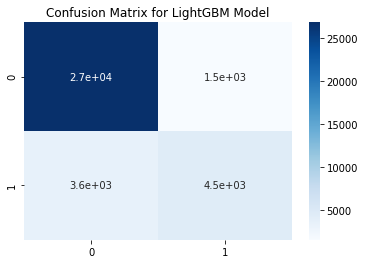

In [33]:
y_pred_lgbm = lightgbmc.predict(x_test)
report3 = classification_report(y_test, y_pred_lgbm)
print(report3)
print("LightGBM Model Accuracy:",accuracy_score(y_test,y_pred_lgbm)*100,"%")
cm3 = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm3, annot=True,cmap="Blues")
plt.title("Confusion Matrix for LightGBM Model")
plt.show()

 Neural Network

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=3)

In [36]:
nn = Sequential()

nn.add(Dense(units = 60,kernel_initializer='uniform',activation = 'relu',input_dim = 21))
nn.add(Dense(units = 30,kernel_initializer='uniform',activation = 'relu'))
nn.add(Dense(units = 10,kernel_initializer='uniform',activation = 'relu'))
nn.add(Dense(units = 1,activation='sigmoid',kernel_initializer='uniform'))

In [37]:
nn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [38]:
nn.fit(x_train,y_train,epochs = 20,batch_size=20,callbacks=[es])

Epoch 1/20
5455/5455 [==============================] - 28s 2ms/step - loss: 0.3849 - accuracy: 0.8327
Epoch 2/20
5455/5455 [==============================] - 12s 2ms/step - loss: 0.3523 - accuracy: 0.8492
Epoch 3/20
5455/5455 [==============================] - 11s 2ms/step - loss: 0.3487 - accuracy: 0.8497
Epoch 4/20
5455/5455 [==============================] - 12s 2ms/step - loss: 0.3481 - accuracy: 0.8489
Epoch 00004: early stopping


In [42]:
y_pred_nn = nn.predict(x_test)
y_train_pred = nn.predict(x_train)
y_pred_nn = np.where(y_pred_nn > 0.5, 1, 0)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28301
           1       0.73      0.49      0.59      8064

    accuracy                           0.85     36365
   macro avg       0.80      0.72      0.75     36365
weighted avg       0.84      0.85      0.83     36365

NN Model Accuracy: 84.67482469407398 %


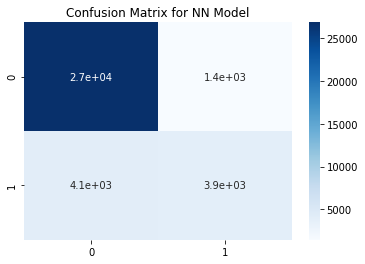

In [49]:
#y_pred_nn = nn.predict(x_test)
report4 = classification_report(y_test, y_pred_nn)
print(report4)
print("NN Model Accuracy:",accuracy_score(y_test,y_pred_nn)*100,"%")
cm4 = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm4, annot=True,cmap="Blues")
plt.title("Confusion Matrix for NN Model")
plt.show()